In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/CSE445/Dataset/After_preprocessing_Maternal-Health-Risk-Data-Set.csv')
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel,BP
0,25,130,80,15.0,98.0,86,3.0,3.0
1,35,140,90,13.0,98.0,70,3.0,3.0
2,29,90,70,8.0,100.0,80,3.0,2.0
3,30,140,85,7.0,98.0,70,3.0,3.0
4,35,120,60,6.1,98.0,76,1.0,2.0


In [4]:
# Run commands for beautifying figures
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [5]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "decision_trees"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:
X = df.drop(columns = 'RiskLevel')
y = df['RiskLevel']

In [7]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

#smote = SMOTE(sampling_strategy='minority')
#X_sm, y_sm = smote.fit_sample(X, y)

#y_sm.value_counts()
y.value_counts()

3.0    406
1.0    406
2.0    406
Name: RiskLevel, dtype: int64

In [8]:
X.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BP
0,25,130,80,15.0,98.0,86,3.0
1,35,140,90,13.0,98.0,70,3.0
2,29,90,70,8.0,100.0,80,2.0
3,30,140,85,7.0,98.0,70,3.0
4,35,120,60,6.1,98.0,76,2.0


In [9]:
y.head()

0    3.0
1    3.0
2    3.0
3    3.0
4    1.0
Name: RiskLevel, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(974, 7) (974,) (244, 7) (244,)


In [11]:
X_train

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,BP
432,40,140,100,13.00,101.000000,66,3.0
277,60,120,85,15.00,98.000000,60,2.0
721,28,85,60,9.00,101.000000,86,1.0
1062,57,94,67,6.80,99.209091,78,2.0
678,23,140,80,7.01,98.000000,70,3.0
...,...,...,...,...,...,...,...
1044,26,85,60,6.00,101.000000,86,1.0
1095,23,140,90,6.80,98.000000,70,3.0
1130,50,140,95,17.00,98.000000,60,3.0
860,17,90,63,6.90,101.000000,70,2.0


In [12]:
y_train

432     3.0
277     3.0
721     2.0
1062    2.0
678     3.0
       ... 
1044    2.0
1095    3.0
1130    3.0
860     2.0
1126    3.0
Name: RiskLevel, Length: 974, dtype: float64

In [13]:
print(X_train.shape)

(974, 7)


In [14]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training set and transform it
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same scaler transformation to the test set
X_test_scaled = scaler.transform(X_test)

# Check the shapes of the scaled datasets
print(X_train_scaled.shape, y_train.shape, X_test_scaled.shape, y_test.shape)

(974, 7) (974,) (244, 7) (244,)


### Build a model (ANN) in tensorflow/keras

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

# Convert the target labels to categorical format
y_train_categorical = to_categorical(y_train)

# Determine the number of unique classes
num_classes = y_train_categorical.shape[1]

# Create a sequential model
model = Sequential()

# Add layers to the model
model.add(Dense(units=10, input_dim=7, activation='relu'))
model.add(Dense(units=6, activation='relu'))
model.add(Dense(units=num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fit the model
#model.fit(X_train_scaled, y_train_categorical, batch_size=32, epochs=50, verbose=1)


Epoch 1/50
31/31 [==============================] - 1s 10ms/step - loss: 1.4316 - accuracy: 0.2474 - val_loss: 1.3758 - val_accuracy: 0.2787
Epoch 2/50
31/31 [==============================] - 0s 3ms/step - loss: 1.3619 - accuracy: 0.3285 - val_loss: 1.3195 - val_accuracy: 0.3361
Epoch 3/50
31/31 [==============================] - 0s 3ms/step - loss: 1.3027 - accuracy: 0.3891 - val_loss: 1.2629 - val_accuracy: 0.3934
Epoch 4/50
31/31 [==============================] - 0s 4ms/step - loss: 1.2410 - accuracy: 0.4723 - val_loss: 1.2066 - val_accuracy: 0.4426
Epoch 5/50
31/31 [==============================] - 0s 3ms/step - loss: 1.1847 - accuracy: 0.5277 - val_loss: 1.1591 - val_accuracy: 0.4590
Epoch 6/50
31/31 [==============================] - 0s 3ms/step - loss: 1.1392 - accuracy: 0.5647 - val_loss: 1.1258 - val_accuracy: 0.4836
Epoch 7/50
31/31 [==============================] - 0s 3ms/step - loss: 1.1050 - accuracy: 0.5616 - val_loss: 1.0964 - val_accuracy: 0.5369
Epoch 8/50
31/31 [=

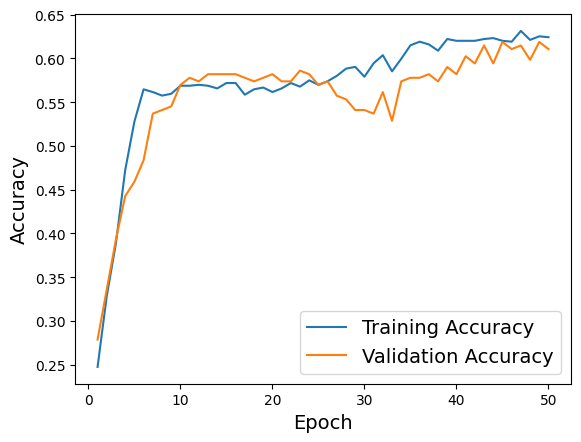

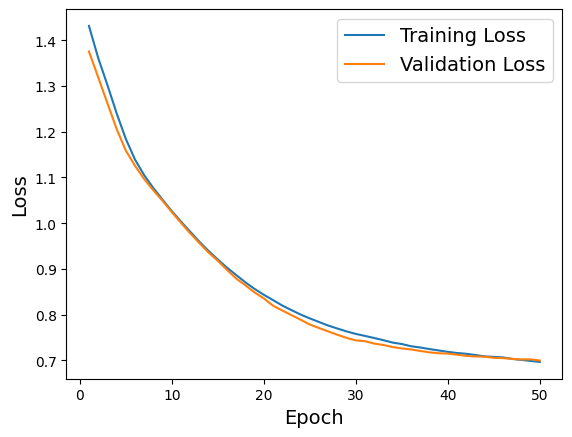

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import seaborn as sns

# Fit the model and store the training history
history = model.fit(X_train_scaled, y_train_categorical, batch_size=32, epochs=50, verbose=1, validation_data=(X_test_scaled, to_categorical(y_test)))

# Get the accuracy and loss values from the training history
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

# Plot accuracy vs epoch
plt.plot(np.arange(1, len(accuracy) + 1), accuracy, label='Training Accuracy')
plt.plot(np.arange(1, len(val_accuracy) + 1), val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss vs epoch
plt.plot(np.arange(1, len(loss) + 1), loss, label='Training Loss')
plt.plot(np.arange(1, len(val_loss) + 1), val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [17]:
# Predict the probabilities for the test data
y_test_pred_prob = model.predict(X_test_scaled)

# Predict the classes for the test data
y_test_pred = np.argmax(y_test_pred_prob, axis=1)

# Generate the classification report
classification_rep = classification_report(y_test, y_test_pred)
print('Classification Report:')
print(classification_rep)


8/8 [==============================] - 0s 2ms/step
Classification Report:
              precision    recall  f1-score   support

         1.0       0.52      0.77      0.62        87
         2.0       0.41      0.20      0.27        81
         3.0       0.88      0.87      0.87        76

    accuracy                           0.61       244
   macro avg       0.60      0.61      0.59       244
weighted avg       0.59      0.61      0.58       244



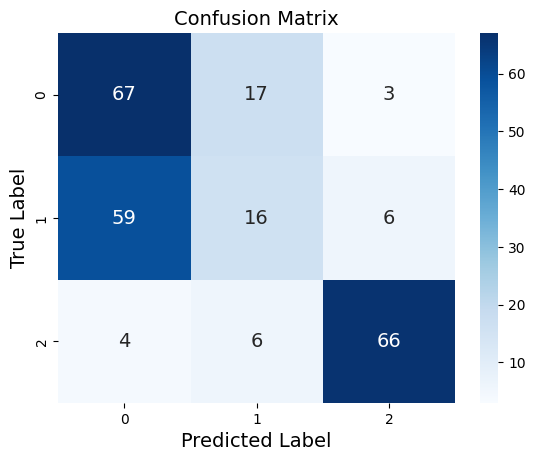

In [18]:
# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()